# Plot with Points

In [1]:
import yfinance as yf

from mplchart.chart import Chart
from mplchart.primitives import Candlesticks
from mplchart.datamodels import ChartPoint

## Fetching the prices

In [2]:
ticker = "AAPL"
aapl = yf.Ticker(ticker).history(period="1y")
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-01 00:00:00-04:00,195.203322,195.690723,194.248386,194.576645,35175100,0.0,0.0
2023-08-02 00:00:00-04:00,194.009649,194.148908,190.836513,191.562653,50389300,0.0,0.0
2023-08-03 00:00:00-04:00,190.558007,191.353768,189.682650,190.160110,61235200,0.0,0.0
2023-08-04 00:00:00-04:00,184.539961,186.390136,180.958973,181.028610,115799700,0.0,0.0
2023-08-07 00:00:00-04:00,181.167853,182.162570,176.413106,177.905182,97576100,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,218.699997,219.490005,216.009995,217.960007,41601300,0.0,0.0
2024-07-29 00:00:00-04:00,216.960007,219.300003,215.750000,218.240005,36311800,0.0,0.0
2024-07-30 00:00:00-04:00,219.190002,220.330002,216.119995,218.800003,41643800,0.0,0.0


### With arrows and arrowprops

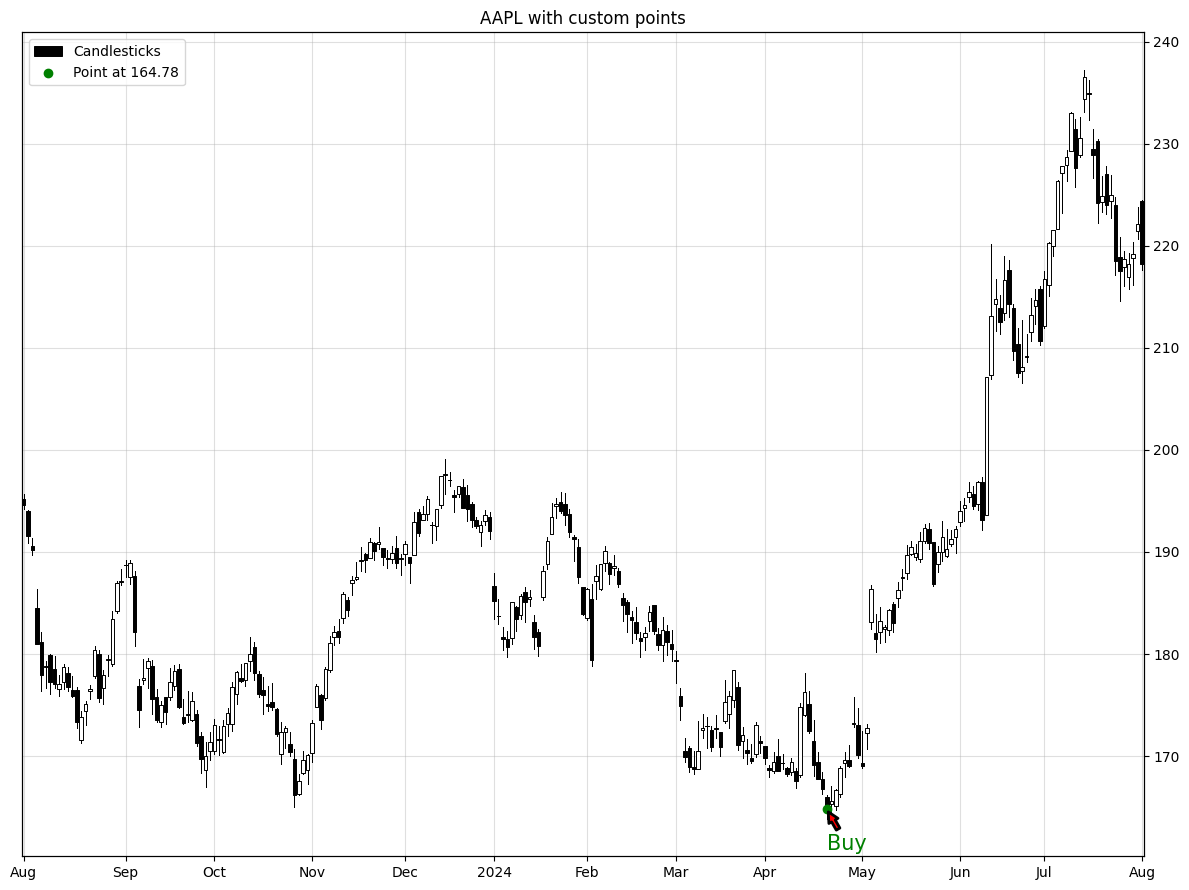

In [3]:
# Calculate a price via an algorithm ...

min_close_index = aapl['Close'].idxmin()
datetime_for_min_close = aapl.loc[min_close_index].name
price_for_min_close = aapl.loc[min_close_index, 'Close']

title = "AAPL with custom points"

indicators = [
    Candlesticks(),
]

chart_points = [
    ChartPoint(
        datetime=datetime_for_min_close,
        price=price_for_min_close,
        arrow=True,
        label="Buy",
        label_offset=-4,
        color="green",
        arrowprops={"facecolor":"red", "arrowstyle":"simple", "linewidth":2}
    )
]
chart = Chart(title=title)
chart.plot(aapl, indicators)
chart.plot_points(chart_points)

### Without arrows

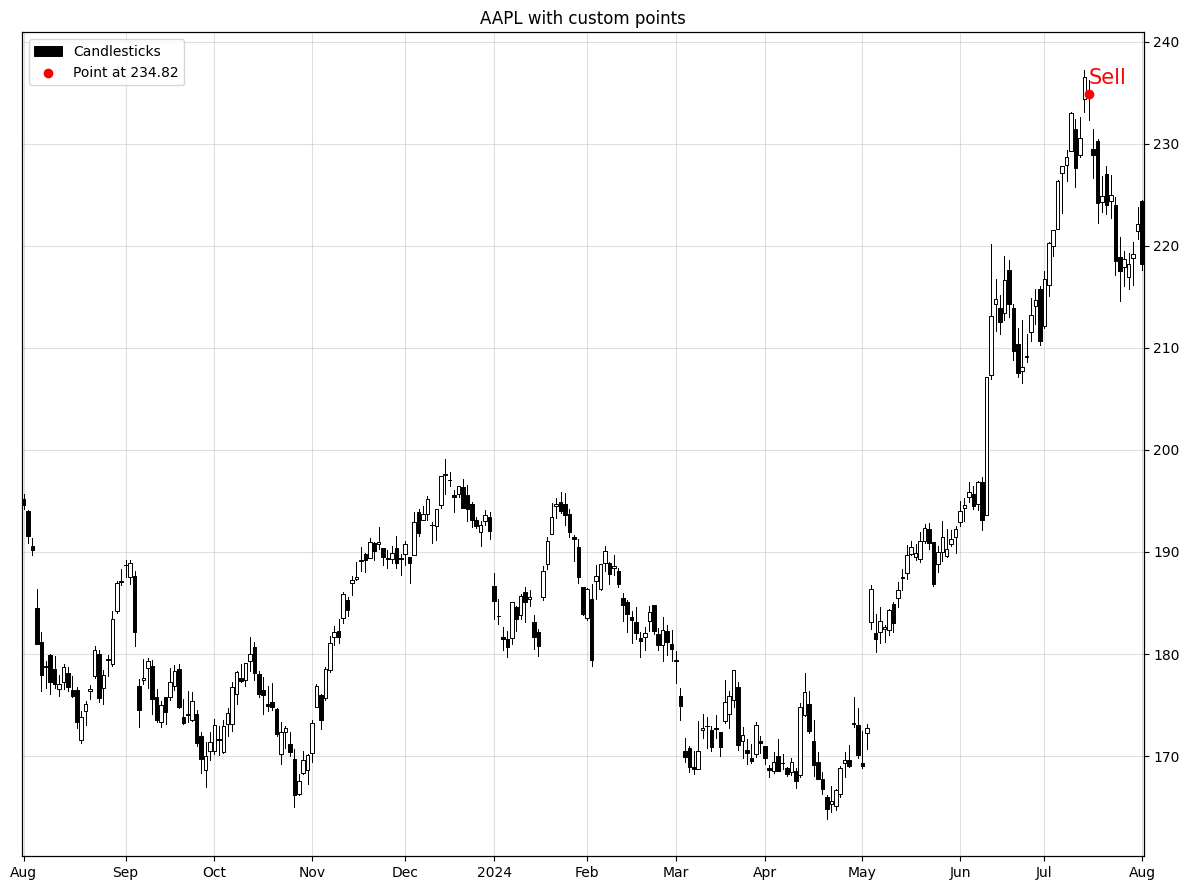

In [4]:
# Calculate a price via an algorithm ...

max_close_index = aapl['Close'].idxmax()
datetime_for_max_close = aapl.loc[max_close_index].name
price_for_max_close = aapl.loc[max_close_index, 'Close']

title = "AAPL with custom points"

indicators = [
    Candlesticks(),
]

chart_points = [
    ChartPoint(
        datetime=datetime_for_max_close,
        price=price_for_max_close,
        label="Sell",
        color="red",
    )
]
chart = Chart(title=title)
chart.plot(aapl, indicators)
chart.plot_points(chart_points)